In [499]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing 

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. 
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [501]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [502]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Let's start by checking the datatype that we have in our dataset:

In [504]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'ID' has 2240 unique numerical items
Column 'Year_Birth' has 59 unique numerical items
Column 'Education' has 5 unique categorical items
Column 'Marital_Status' has 8 unique categorical items
Column 'Income' has 1974 unique numerical items
Column 'Kidhome' has 3 unique numerical items
Column 'Teenhome' has 3 unique numerical items
Column 'Dt_Customer' has 663 unique categorical items
Column 'Recency' has 100 unique numerical items
Column 'MntWines' has 776 unique numerical items
Column 'MntFruits' has 158 unique numerical items
Column 'MntMeatProducts' has 558 unique numerical items
Column 'MntFishProducts' has 182 unique numerical items
Column 'MntSweetProducts' has 177 unique numerical items
Column 'MntGoldProds' has 213 unique numerical items
Column 'NumDealsPurchases' has 15 unique numerical items
Column 'NumWebPurchases' has 15 unique numerical items
Column 'NumCatalogPurchases' has 14 unique numerical items
Column 'NumStorePurchases' has 14 unique numerical items
Column 'N

#### We can see that the majority of the columns present numerical values. We also can notice that there is a column named 'Dt_customer' that should be in the correct date format, so we will take care of this first:

In [506]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


#### Now that the date is in the correct format, we can check if we have any missing values in the dataset:

In [508]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'ID' has 0 missing values
Column 'Year_Birth' has 0 missing values
Column 'Education' has 0 missing values
Column 'Marital_Status' has 0 missing values
Column 'Income' has 24 missing values
Column 'Kidhome' has 0 missing values
Column 'Teenhome' has 0 missing values
Column 'Dt_Customer' has 0 missing values
Column 'Recency' has 0 missing values
Column 'MntWines' has 0 missing values
Column 'MntFruits' has 0 missing values
Column 'MntMeatProducts' has 0 missing values
Column 'MntFishProducts' has 0 missing values
Column 'MntSweetProducts' has 0 missing values
Column 'MntGoldProds' has 0 missing values
Column 'NumDealsPurchases' has 0 missing values
Column 'NumWebPurchases' has 0 missing values
Column 'NumCatalogPurchases' has 0 missing values
Column 'NumStorePurchases' has 0 missing values
Column 'NumWebVisitsMonth' has 0 missing values
Column 'AcceptedCmp3' has 0 missing values
Column 'AcceptedCmp4' has 0 missing values
Column 'AcceptedCmp5' has 0 missing values
Column 'Accepted

#### We have 24 missing values in the Income column. Since is a low number of missing values, we can directly drop them:

In [510]:
df = df.dropna()

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'ID' has 0 missing values
Column 'Year_Birth' has 0 missing values
Column 'Education' has 0 missing values
Column 'Marital_Status' has 0 missing values
Column 'Income' has 0 missing values
Column 'Kidhome' has 0 missing values
Column 'Teenhome' has 0 missing values
Column 'Dt_Customer' has 0 missing values
Column 'Recency' has 0 missing values
Column 'MntWines' has 0 missing values
Column 'MntFruits' has 0 missing values
Column 'MntMeatProducts' has 0 missing values
Column 'MntFishProducts' has 0 missing values
Column 'MntSweetProducts' has 0 missing values
Column 'MntGoldProds' has 0 missing values
Column 'NumDealsPurchases' has 0 missing values
Column 'NumWebPurchases' has 0 missing values
Column 'NumCatalogPurchases' has 0 missing values
Column 'NumStorePurchases' has 0 missing values
Column 'NumWebVisitsMonth' has 0 missing values
Column 'AcceptedCmp3' has 0 missing values
Column 'AcceptedCmp4' has 0 missing values
Column 'AcceptedCmp5' has 0 missing values
Column 'AcceptedC

#### Before continuing, we are going to create a new feature that tells us how much time a customer has been in the database. For that, we will first get the minimum and maximum dates in the date column:

In [512]:
dates = []
for date in df['Dt_Customer']:
    date = date.date()
    dates.append(date)

print('Oldest customer since:', min(dates))
print('Newest customer since:', max(dates))

Oldest customer since: 2012-07-30
Newest customer since: 2014-06-29


#### Now we can obtain the number of days:

In [514]:
days = []
d1 = max(dates)   # We will obtain the number of days using the newest customer

for date in dates:
    delta = d1 - date
    days.append(delta)

df['num_days'] = days
df['num_days'] = df['num_days'].dt.days
df['num_days'].head()

0    663
1    113
2    312
3    139
4    161
Name: num_days, dtype: int64

#### Now the dataset is looking clearer. Let's modify some of the columns to extract some information that can be useful for the market. We will start by calculating the age of the customers instead of showing the year_birth column:

In [516]:
df['Age'] = 2025 - df['Year_Birth']
df['Age'].head()

0    68
1    71
2    60
3    41
4    44
Name: Age, dtype: int64

#### Next, there are several columns in the dataset dedicated to show the total amount spent in a 2 years period in different products, so we can calculate the total amount of spent money by customer:

In [518]:
df['Total_spent'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['Total_spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Total_spent, dtype: int64

#### Next, we can see that the 'Living_with' column present some redundant values, so we will simplify them to two:

In [520]:
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner',
                                                 'Together':'Partner',
                                                 'Absurd':'Alone',
                                                 'Widow':'Alone',
                                                 'YOLO':'Alone',
                                                 'Divorced':'Alone',
                                                 'Single':'Alone'})

#### Now we are going to calculate the total number of children living in the customer house:

In [522]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].head()

0    0
1    2
2    0
3    1
4    1
Name: Children, dtype: int64

#### With this information, we can now calculate the total number of individuals living in a house:

In [524]:
df['Family_Size'] = df['Living_With'].replace({'Alone': 1,
                                              'Partner': 2}) + df['Children']
df['Family_Size'].head()

0    1
1    3
2    2
3    3
4    3
Name: Family_Size, dtype: int64

#### Let's create a new column showing if the customer is a parent or not:

In [526]:
df['Parent'] = np.where(df.Children > 0, 1, 0)
df['Parent'].head()

0    0
1    1
2    0
3    1
4    1
Name: Parent, dtype: int32

#### Now we can simplify the education level:

In [528]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate',
                                          '2n Cycle':'Undergraduate',
                                          'Graduation':'Graduate',
                                          'Master':'Postgraduate',
                                          'PhD':'Postgraduate'})
df['Education'].head()

0        Graduate
1        Graduate
2        Graduate
3        Graduate
4    Postgraduate
Name: Education, dtype: object

#### Now we can drop the features that have become redundant:

In [530]:
df.drop(['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], axis = 1, inplace = True)
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,num_days,Age,Total_spent,Living_With,Children,Family_Size,Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,68,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,71,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,60,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,41,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,44,422,Partner,1,3,1


#### We can perform a simple statistical analysis:

In [532]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


#### We can see that the maximum age is 132 years, which is impossible. This happens since this dataset is old and the ages have been calculated in 2025, so probably this customers are dead by now.

## Exploratory Data Analysis

#### Let's start with a pairplot of some selected features:

<Figure size 640x480 with 0 Axes>

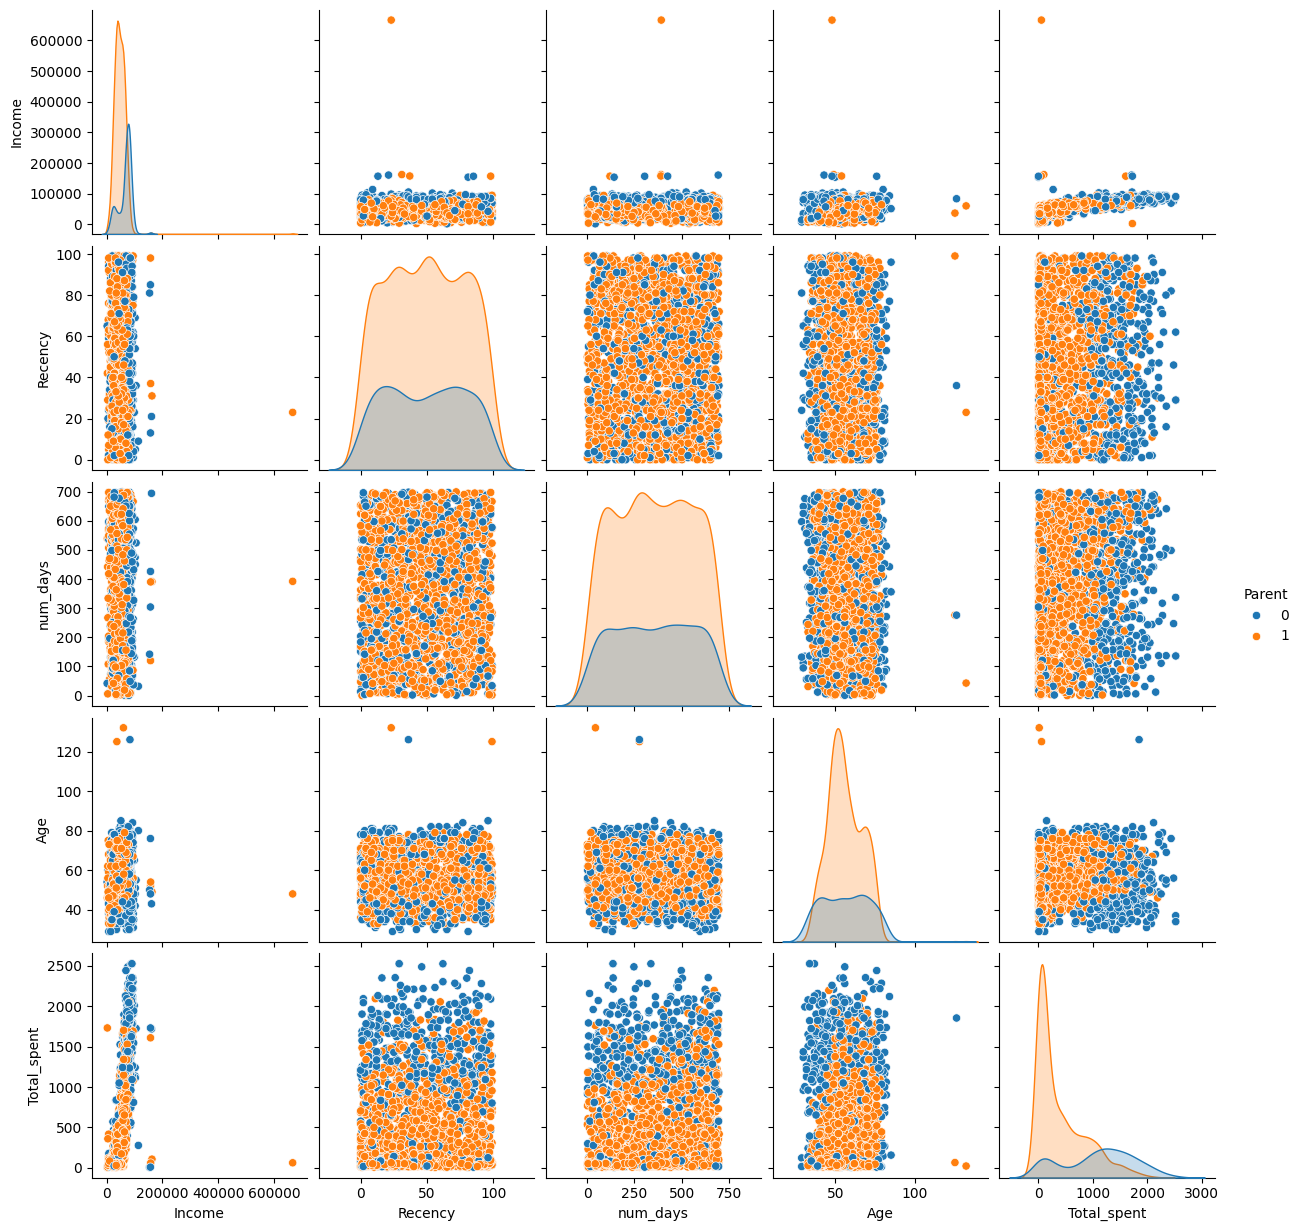

In [535]:
To_Plot = [ "Income", "Recency", "num_days", "Age", "Total_spent", "Parent"]
plt.figure()
sns.pairplot(df[To_Plot], hue= "Parent")

#### We can see that there are some outliers in the income and age columns, so we will take care of them by setting a cap:

In [537]:
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]

<Figure size 640x480 with 0 Axes>

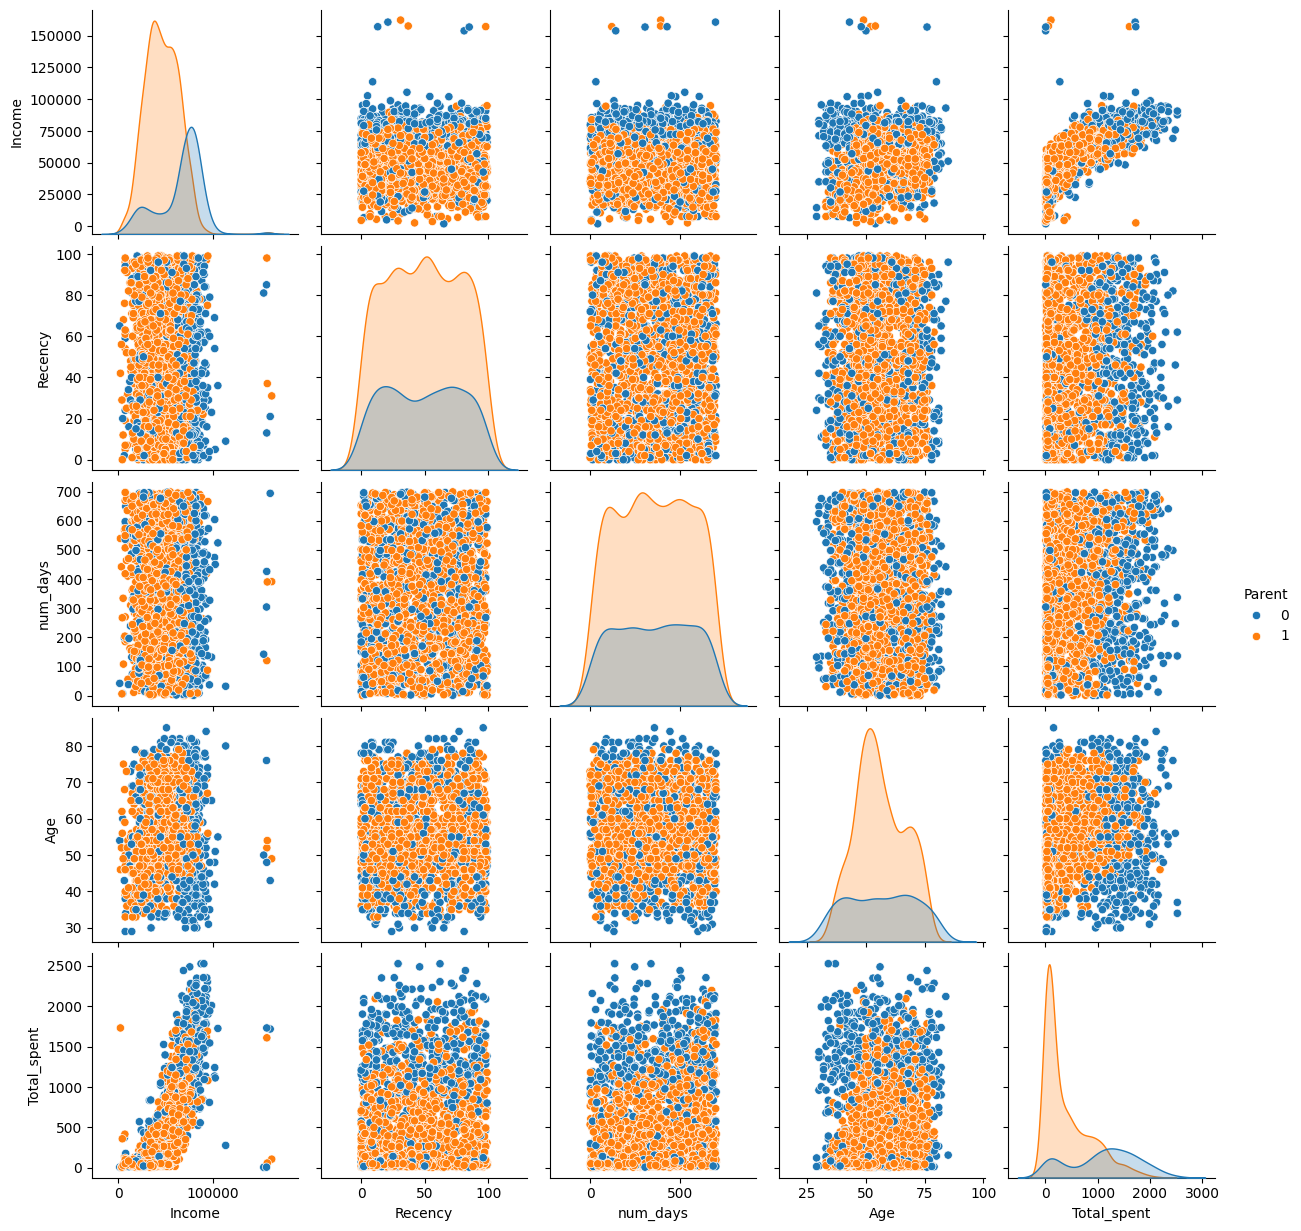

In [538]:
To_Plot = [ "Income", "Recency", "num_days", "Age", "Total_spent", "Parent"]
plt.figure()
sns.pairplot(df[To_Plot], hue= "Parent")

#### Now we can make a correlation map to explore the data:

Text(0.5, 1.0, 'Correlation map')

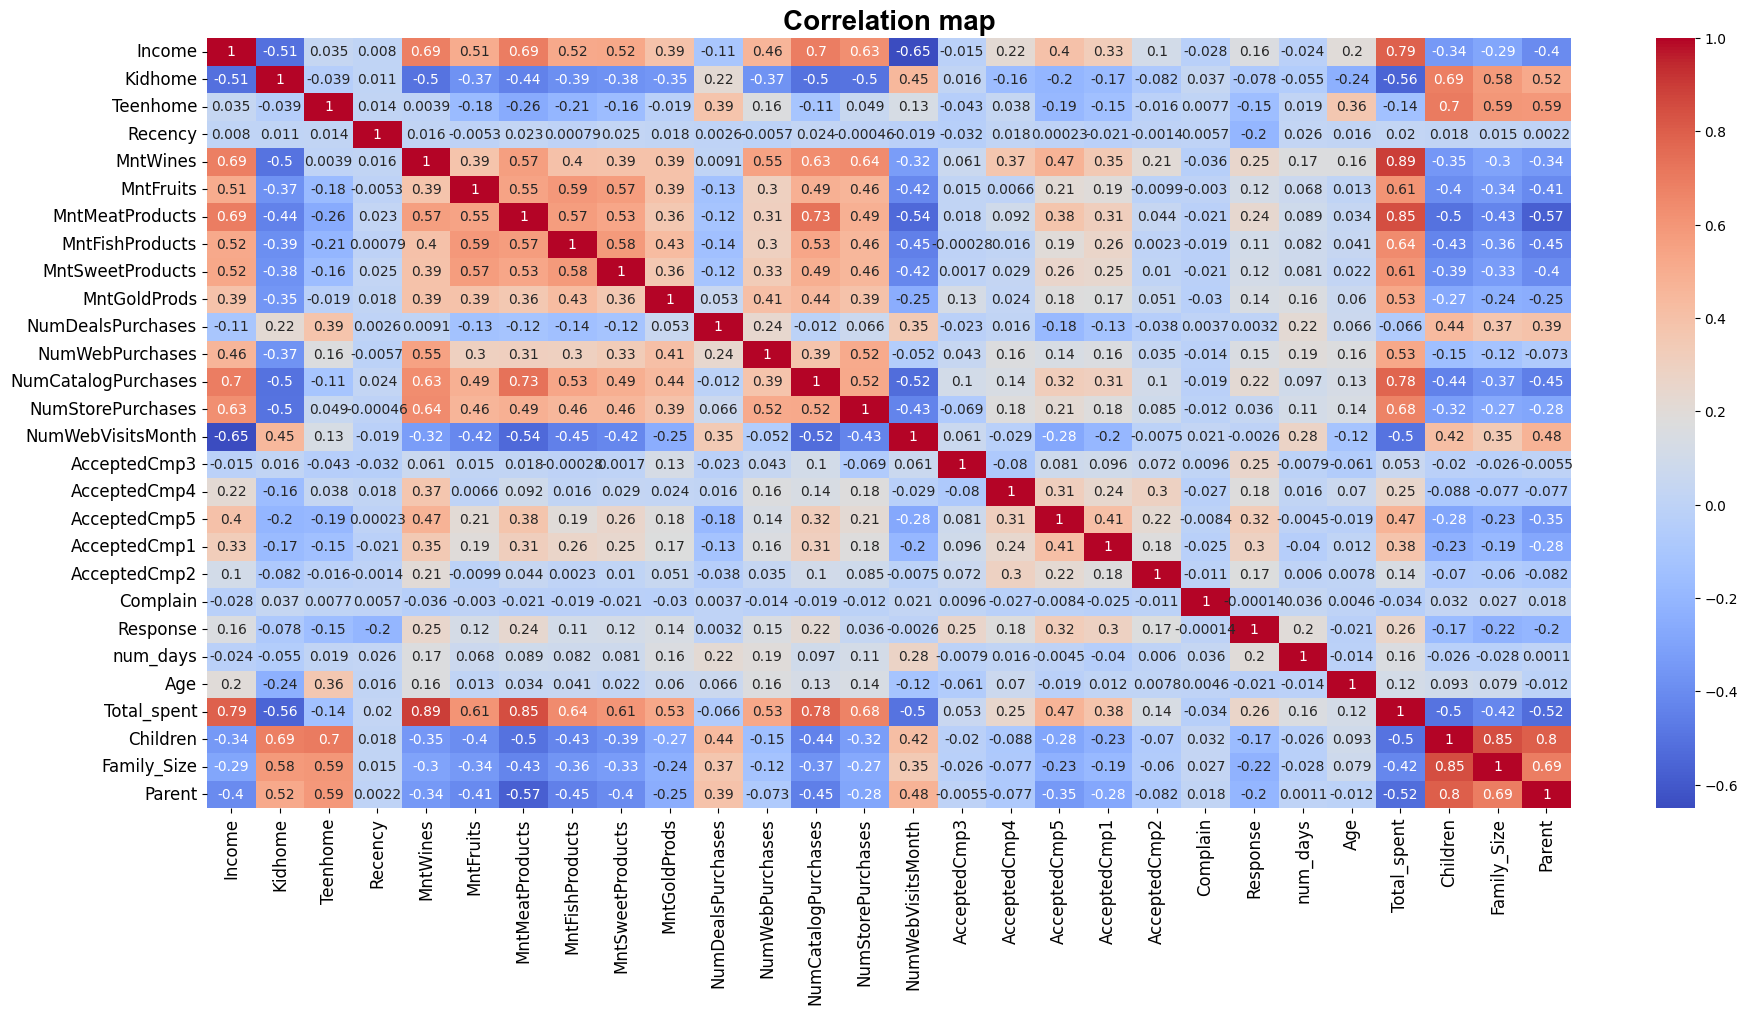

In [540]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(22, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### Before starting with the clustering process, we need to encode the categorical data and do some other manipulation

In [542]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = df.select_dtypes(include = ['object', 'category']).columns

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [543]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Response,num_days,Age,Total_spent,Living_With,Children,Family_Size,Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,68,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,71,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,60,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,41,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,44,422,1,1,3,1


#### Now that all the features are numerical, we will drop some of the columns that are not useful for clustering:

In [545]:
df = df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis = 1)

In [546]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_days,Age,Total_spent,Living_With,Children,Family_Size,Parent
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,663,68,1617,0,0,1,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,113,71,27,0,2,3,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,312,60,776,1,0,2,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,139,41,53,1,1,3,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,161,44,422,1,1,3,1


#### Finally, we can scale the features:

In [548]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df[:] = sc.fit_transform(df)

In [568]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,num_days,Age,Total_spent,Living_With,Children,Family_Size,Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


#### At this moment, there are many columns in our dataset, so the clustering process will have a hard time performing. For that reason, we will be performing dimensionality reduction and obtain a set of principal variables (PCA). We will reduce the dimensions to 3, so we can plot them in a 3D space:

In [588]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns = (['Col1', 'Col2','Col3']))

In [590]:
PCA_df.head()

,Col1,Col2,Col3
0,4.986336,-0.161514,2.445404
1,-2.874168,0.022697,-1.530795
2,2.615763,-0.731421,-0.264422
3,-2.654568,-1.455878,-0.398370
4,-0.656015,0.177864,-0.141286


#### Let's plot the new data:

Text(0.5, 0, 'Col3')

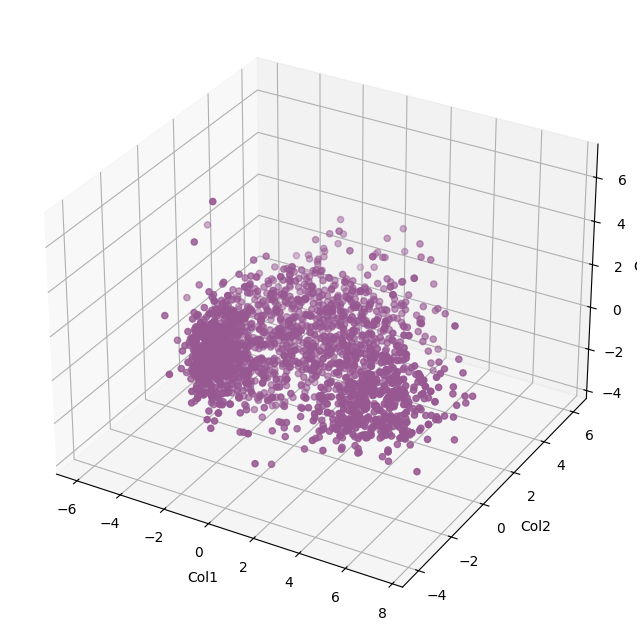

In [621]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(PCA_df['Col1'], PCA_df['Col2'], PCA_df['Col3'], c = '#975892', marker = 'o')
ax.set_xlabel('Col1')
ax.set_ylabel('Col2')
ax.set_zlabel('Col3')

## Clustering

#### Now the data is completely prepared for the clustering process. We will start by performing the elbow method to know the optimal number of clusters:

In [627]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   -- ------------------------------------- 20.5/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 991.0 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 787.7 kB/s eta 0:00:01
   --------------------- ------------------ 153.6/282.6 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 184.3/282.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.3 MB/s eta 0:00:00


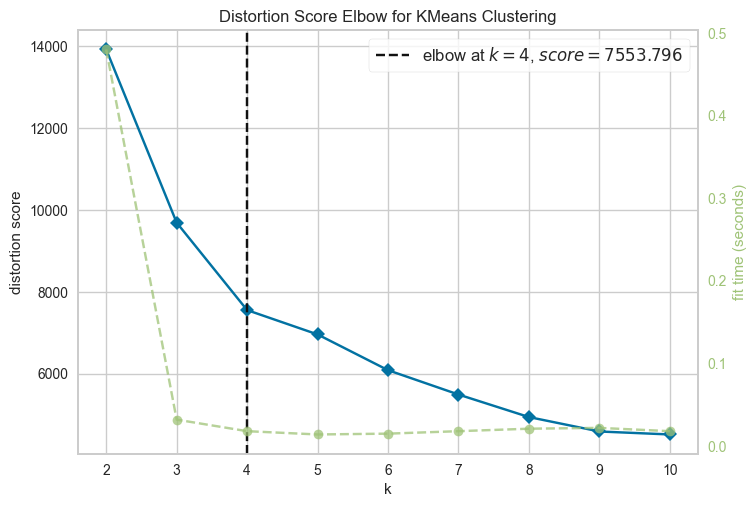

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [631]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

#### Now we know that 4 is the optimal number of clusters for our job. Next, we will be using the Agglomerative Clustering Model to get the final clusters:

In [644]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 4)
y_pred = ac.fit_predict(PCA_df)
PCA_df['Clusters'] = y_pred
df['Clusters'] = y_pred
PCA_df.head()

,Col1,Col2,Col3,Clusters
0,4.986336,-0.161514,2.445404,2
1,-2.874168,0.022697,-1.530795,3
2,2.615763,-0.731421,-0.264422,2
3,-2.654568,-1.455878,-0.398370,1
4,-0.656015,0.177864,-0.141286,3


Text(0.5, 0, 'Col3')

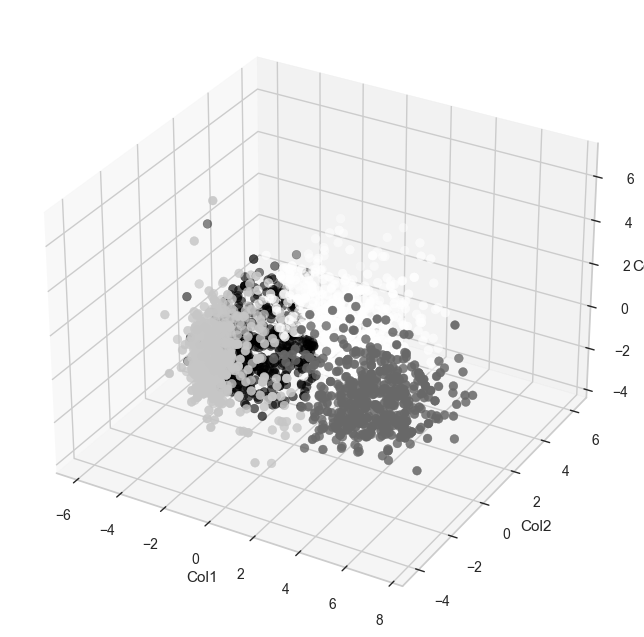

In [642]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(PCA_df['Col1'], PCA_df['Col2'], PCA_df['Col3'], s = 40, c = PCA_df['Clusters'], marker = 'o')
ax.set_xlabel('Col1')
ax.set_ylabel('Col2')
ax.set_zlabel('Col3')

## Evaluation

Text(0.5, 1.0, 'Cluster distribution')

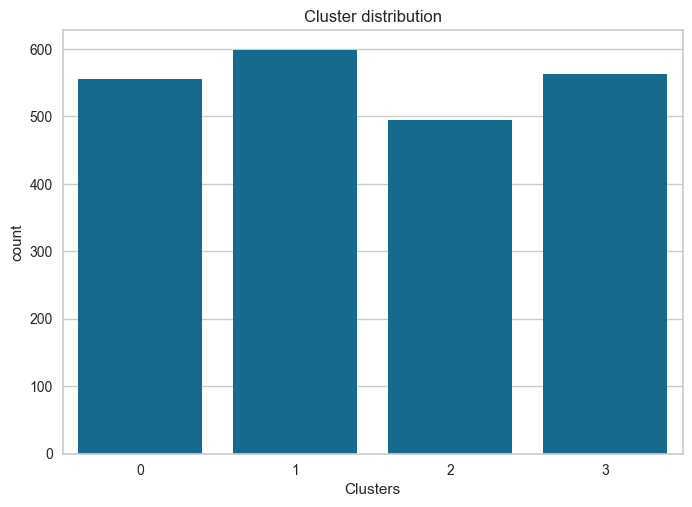

In [648]:
pl = sns.countplot(x = df['Clusters'])
pl.set_title('Cluster distribution')

#### We can see that the clusters seem to be fairly distributed

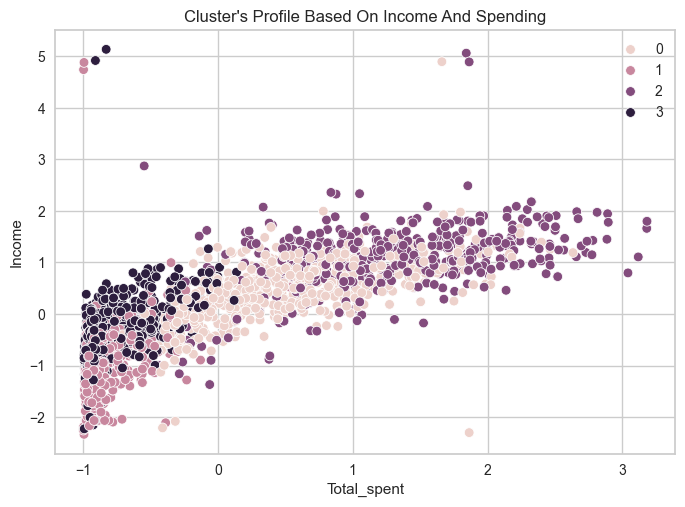

In [656]:
pl = sns.scatterplot(data = df,x=df["Total_spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()

#### From this plot we can obtain the clusters pattern:

#### - Cluster 0 --> low spending and average income
#### - Cluster 1 --> low spending and low income
#### - Cluster 2 --> high spending and average income
#### - Cluster 3 --> low spending and low-average income

C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gabri\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.2% of the points

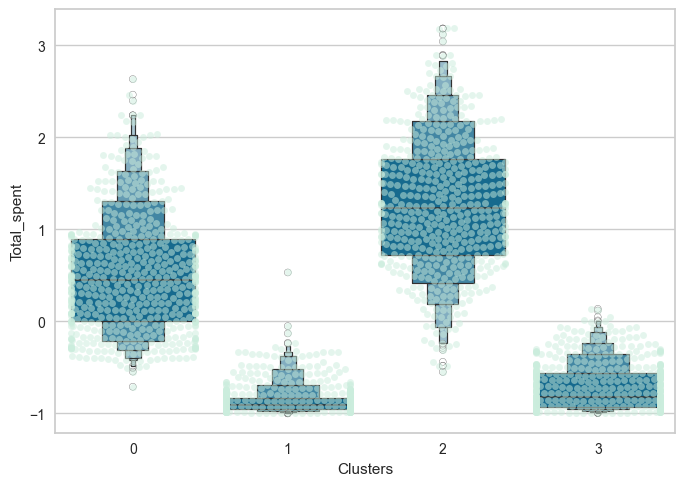

In [661]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Total_spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Total_spent"])

#### We can see that cluster 2 is our biggest set of customers, followed by cluster 0.